In [216]:
import numpy as np 
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, fixed, FloatRangeSlider
N = norm.cdf

In [217]:
def call_BS(S,K,T,r,vol):
    d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol*np.sqrt(T)
    return S*N(d1) - K*np.exp(-r*T)*N(d2)

def put_BS(S,K,T,r,vol):
    d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol*np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2)-S*N(-d1)

In [218]:
from ipywidgets import interact, FloatSlider, fixed

def plot_black_scholes(S_min, S_max, K, T, r, vol, option_type):
    S = np.arange(S_min, S_max, 0.1)
    if option_type == "Call":
        prices = [call_BS(s, K, T, r, vol) for s in S]
        payoff = [max(0, s-K) for s in S]
    elif option_type == "Put":
        prices = [put_BS(s, K, T, r, vol) for s in S]
        payoff = [max(0,K-s) for s in S]
    print(payoff)
    plt.figure(figsize=(10, 6))
    plt.plot(S, prices, label=f'{option_type} Option Price')
    plt.plot(S, payoff,color='Black',linestyle='--')
    plt.axvline(K, color='red', linestyle='--', label='Strike Price (K)')
    plt.title(f'Black-Scholes {option_type} Option Pricing')
    plt.xlabel('Underlying Price (S)')
    plt.ylabel('Option Price')
    plt.legend()
    plt.grid()
    plt.show()

interact(
    plot_black_scholes,
    S_min=FloatSlider(value=50, min=10, max=150, step=1, description='S_min'),
    S_max=FloatSlider(value=150, min=50, max=200, step=1, description='S_max'),
    K=FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K)'),
    T=FloatSlider(value=1, min=0.01, max=2, step=0.01, description='Time to Maturity (T)'),
    r=FloatSlider(value=0.05, min=0.0, max=0.2, step=0.01, description='Risk-free Rate (r)'),
    vol=FloatSlider(value=0.2, min=0.01, max=1, step=0.01, description='Volatility (σ)'),
    option_type=["Call", "Put"]
)

interactive(children=(FloatSlider(value=50.0, description='S_min', max=150.0, min=10.0, step=1.0), FloatSlider…

<function __main__.plot_black_scholes(S_min, S_max, K, T, r, vol, option_type)>

## Computing of $\Delta$

In [219]:
def delta(S,K,T,r,vol,option_type):
    d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
    if option_type == "Call" : 
        return norm.cdf(d1)
    elif option_type == "Put":
        return norm.cdf(d1)-1

In [220]:
def derivates(f,x,dx):
    return (f(x+dx)-f(x-dx))/(2*dx)


def plot_deltas(K, T, r, vol, option_type, long_short):
    if option_type == "Call":
        if long_short == "Long":
            Delta = [derivates(lambda x : call_BS(x,K,T,r,vol),x,0.001) for x in S]
        else: 
            Delta = [derivates(lambda x : -call_BS(x,K,T,r,vol),x,0.001) for x in S]
    elif option_type == "Put":
        if long_short == "Long":
            Delta = [derivates(lambda x : put_BS(x,K,T,r,vol),x,0.001) for x in S]
        elif long_short == "Short":
             Delta = [derivates(lambda x : -put_BS(x,K,T,r,vol),x,0.001) for x in S]
    
    plt.figure(figsize=(10, 6))
    plt.plot(S/K, Delta, label=f'{option_type} Delta')
    plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
    plt.title(f'$\Delta$ {long_short} {option_type} ')
    plt.xlabel('S/K')
    plt.ylabel(f'$\Delta$')
    plt.legend()
    plt.grid()
    plt.show()

interact(
    plot_deltas,
    K=FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K)'),
    T=FloatSlider(value=1, min=0.01, max=2, step=0.01, description='Time to Maturity (T)'),
    r=FloatSlider(value=0.1, min=0.01, max=0.2, step=0.01, description='Risk-free Rate (r)'),
    vol=FloatSlider(value=0.3, min=0.01, max=1, step=0.01, description='Volatility (σ)'),
    option_type=["Call", "Put"],
    long_short = ["Long","Short"],
)

## Si je veux voir les 4 graphiques en même temps 
'''
    # Création des sous-graphiques
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Graphique 1 : Delta Long Call
    axs[0, 0].plot(S/K, Delta_Long_Call, label='Delta Long Call', color='blue')
    axs[0, 0].set_title('Delta Long Call')
    axs[0, 0].set_xlabel('S/K')
    axs[0, 0].set_ylabel('Delta')
    axs[0, 0].grid()
    axs[0, 0].legend()

    # Graphique 2 : Delta Short Call
    axs[0, 1].plot(S/K, Delta_Short_Call, label='Delta Short Call', color='red')
    axs[0, 1].set_title('Delta Short Call')
    axs[0, 1].set_xlabel('S/K')
    axs[0, 1].set_ylabel('Delta')
    axs[0, 1].grid()
    axs[0, 1].legend()

    # Graphique 3 : Delta Long Put
    axs[1, 0].plot(S/K, Delta_Long_Put, label='Delta Long Put', color='green')
    axs[1, 0].set_title('Delta Long Put')
    axs[1, 0].set_xlabel('S/K')
    axs[1, 0].set_ylabel('Delta')
    axs[1, 0].grid()
    axs[1, 0].legend()

    # Graphique 4 : Delta Short Put
    axs[1, 1].plot(S/K, Delta_Short_Put, label='Delta Short Put', color='purple')
    axs[1, 1].set_title('Delta Short Put')
    axs[1, 1].set_xlabel('S/K')
    axs[1, 1].set_ylabel('Delta')
    axs[1, 1].grid()
    axs[1, 1].legend()

    # Ajustement des espaces entre les graphiques
    plt.tight_layout()
    plt.show()

interact(
    plot_deltas,
    K=FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K)'),
    T=FloatSlider(value=1, min=0.01, max=2, step=0.01, description='Time to Maturity (T)'),
    r=FloatSlider(value=0.1, min=0.01, max=0.2, step=0.01, description='Risk-free Rate (r)'),
    vol=FloatSlider(value=0.3, min=0.01, max=1, step=0.01, description='Volatility (σ)')
)

'''

<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:22: SyntaxWarning: invalid escape sequence '\D'
<>:20: SyntaxWarning: invalid escape sequence '\D'
<>:22: SyntaxWarning: invalid escape sequence '\D'
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/628486606.py:20: SyntaxWarning: invalid escape sequence '\D'
  plt.title(f'$\Delta$ {long_short} {option_type} ')
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/628486606.py:22: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel(f'$\Delta$')


interactive(children=(FloatSlider(value=100.0, description='Strike Price (K)', max=150.0, min=50.0, step=1.0),…

"\n    # Création des sous-graphiques\n    fig, axs = plt.subplots(2, 2, figsize=(12, 8))\n\n    # Graphique 1 : Delta Long Call\n    axs[0, 0].plot(S/K, Delta_Long_Call, label='Delta Long Call', color='blue')\n    axs[0, 0].set_title('Delta Long Call')\n    axs[0, 0].set_xlabel('S/K')\n    axs[0, 0].set_ylabel('Delta')\n    axs[0, 0].grid()\n    axs[0, 0].legend()\n\n    # Graphique 2 : Delta Short Call\n    axs[0, 1].plot(S/K, Delta_Short_Call, label='Delta Short Call', color='red')\n    axs[0, 1].set_title('Delta Short Call')\n    axs[0, 1].set_xlabel('S/K')\n    axs[0, 1].set_ylabel('Delta')\n    axs[0, 1].grid()\n    axs[0, 1].legend()\n\n    # Graphique 3 : Delta Long Put\n    axs[1, 0].plot(S/K, Delta_Long_Put, label='Delta Long Put', color='green')\n    axs[1, 0].set_title('Delta Long Put')\n    axs[1, 0].set_xlabel('S/K')\n    axs[1, 0].set_ylabel('Delta')\n    axs[1, 0].grid()\n    axs[1, 0].legend()\n\n    # Graphique 4 : Delta Short Put\n    axs[1, 1].plot(S/K, Delta_Short_

## Computing of $\Gamma$

In [221]:
Gamma_Long_Call = [derivates(lambda x: derivates(lambda y: call_BS(y, K, T, r, vol), x, 0.0001), x, 0.0001) for x in S]
Gamma_Short_Call = [derivates(lambda x: derivates(lambda y: -call_BS(y, K, T, r, vol), x, 0.0001), x, 0.0001) for x in S]
Gamma_Long_Put = [derivates(lambda x: derivates(lambda y: put_BS(y, K, T, r, vol), x, 0.0001), x, 0.0001) for x in S]
Gamma_Short_Put = [derivates(lambda x: derivates(lambda y: -put_BS(y, K, T, r, vol), x, 0.0001), x, 0.0001) for x in S]

def plot_gammas(K, T, r, vol, option_type, long_short):
    if option_type == "Call":
        if long_short == "Long":
            Gamma = [derivates(lambda x: derivates(lambda y: call_BS(y, K, T, r, vol), x, 0.0001), x, 0.0001) for x in S]
        else: 
            Gamma = [derivates(lambda x: derivates(lambda y: -call_BS(y, K, T, r, vol), x, 0.0001), x, 0.0001) for x in S]
    if option_type == "Put":
        if long_short == "Long":
            Gamma = [derivates(lambda x: derivates(lambda y: put_BS(y, K, T, r, vol), x, 0.0001), x, 0.0001) for x in S]
        elif long_short == "Short":
             Gamma = [derivates(lambda x: derivates(lambda y: -put_BS(y, K, T, r, vol), x, 0.0001), x, 0.0001) for x in S]
    plt.figure(figsize=(10, 6))
    plt.plot(S/K, Gamma, label=f'{option_type} Gamma')
    plt.axvline(1, color='red', linestyle='--', label='ATM Option')
    plt.title(f'$\Gamma$ {long_short} {option_type} ')
    plt.xlabel('S/K')
    plt.ylabel(f'$\Gamma$')
    plt.legend()
    plt.grid()
    plt.show()



interact(
    plot_gammas,
    K=FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K)'),
    T=FloatSlider(value=1, min=0.01, max=2, step=0.01, description='Time to Maturity (T)'),
    r=FloatSlider(value=0.1, min=0.01, max=0.2, step=0.01, description='Risk-free Rate (r)'),
    vol=FloatSlider(value=0.3, min=0.01, max=1, step=0.01, description='Volatility (σ)'),
    option_type=["Call", "Put"],
    long_short = ["Long","Short"],
)
    
## Si je veux voir les 4 graphs en même temps.
'''
   # Création des sous-graphiques
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))

    # Graphique 1 : Delta Long Call
    axs[0, 0].plot(S/K, Gamma_Long_Call, label='Gamma Long Call', color='blue')
    axs[0, 0].set_title('Gamma Long Call')
    axs[0, 0].set_xlabel('S/K')
    axs[0, 0].set_ylabel('Gamma')
    axs[0, 0].grid()
    axs[0, 0].legend()

    # Graphique 2 : Delta Short Call
    axs[0, 1].plot(S/K, Gamma_Short_Call, label='Gamma Short Call', color='red')
    axs[0, 1].set_title('Gamma Short Call')
    axs[0, 1].set_xlabel('S/K')
    axs[0, 1].set_ylabel('Gamma')
    axs[0, 1].grid()
    axs[0, 1].legend()

    # Graphique 3 : Delta Long Put
    axs[1, 0].plot(S/K, Gamma_Long_Put, label='Gamma Long Put', color='green')
    axs[1, 0].set_title('Gamma Long Put')
    axs[1, 0].set_xlabel('S/K')
    axs[1, 0].set_ylabel('Gamma')
    axs[1, 0].grid()
    axs[1, 0].legend()

    # Graphique 4 : Delta Short Put
    axs[1, 1].plot(S/K, Gamma_Short_Put, label='Gamma Short Put', color='purple')
    axs[1, 1].set_title('Gamma Short Put')
    axs[1, 1].set_xlabel('S/K')
    axs[1, 1].set_ylabel('Gamma')
    axs[1, 1].legend()

    # Ajustement des espaces entre les graphiques
    plt.tight_layout()
    plt.show()
'''

<>:20: SyntaxWarning: invalid escape sequence '\G'
<>:22: SyntaxWarning: invalid escape sequence '\G'
<>:20: SyntaxWarning: invalid escape sequence '\G'
<>:22: SyntaxWarning: invalid escape sequence '\G'
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/2871463679.py:20: SyntaxWarning: invalid escape sequence '\G'
  plt.title(f'$\Gamma$ {long_short} {option_type} ')
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/2871463679.py:22: SyntaxWarning: invalid escape sequence '\G'
  plt.ylabel(f'$\Gamma$')
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/2310501042.py:2: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/2310501042.py:7: RuntimeWarning: divide by zero encountered in divide
  d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))


interactive(children=(FloatSlider(value=100.0, description='Strike Price (K)', max=150.0, min=50.0, step=1.0),…

"\n   # Création des sous-graphiques\n    fig, axs = plt.subplots(2, 2, figsize=(12, 8))\n\n    # Graphique 1 : Delta Long Call\n    axs[0, 0].plot(S/K, Gamma_Long_Call, label='Gamma Long Call', color='blue')\n    axs[0, 0].set_title('Gamma Long Call')\n    axs[0, 0].set_xlabel('S/K')\n    axs[0, 0].set_ylabel('Gamma')\n    axs[0, 0].grid()\n    axs[0, 0].legend()\n\n    # Graphique 2 : Delta Short Call\n    axs[0, 1].plot(S/K, Gamma_Short_Call, label='Gamma Short Call', color='red')\n    axs[0, 1].set_title('Gamma Short Call')\n    axs[0, 1].set_xlabel('S/K')\n    axs[0, 1].set_ylabel('Gamma')\n    axs[0, 1].grid()\n    axs[0, 1].legend()\n\n    # Graphique 3 : Delta Long Put\n    axs[1, 0].plot(S/K, Gamma_Long_Put, label='Gamma Long Put', color='green')\n    axs[1, 0].set_title('Gamma Long Put')\n    axs[1, 0].set_xlabel('S/K')\n    axs[1, 0].set_ylabel('Gamma')\n    axs[1, 0].grid()\n    axs[1, 0].legend()\n\n    # Graphique 4 : Delta Short Put\n    axs[1, 1].plot(S/K, Gamma_Short_P

We can see that $/Gamma$ does not reach it maximum when the Option is ATM. This contradict the theory and also common sens. This error should be there because of the approximation during the derivation. Let's use now the exact formule when derivating two times the Option regarding the underlying

In [222]:
def gamma(S,K,T,r,vol):
    d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
    N_prime_d1 = norm.pdf(d1) 
    gamma_value = (N_prime_d1) / (S*vol*np.sqrt(T))
    return gamma_value

def plot_gammas2(K, T, r, vol, option_type, long_short):
    if option_type == "Call":
        if long_short == "Long":
            Gamma = [gamma(s,K,T,r,vol) for s in S]
        elif long_short == "Short":
            Gamma = [-gamma(s,K,T,r,vol) for s in S]
    if option_type == "Put":
        if long_short == "Long":
            Gamma = [gamma(s,K,T,r,vol) for s in S]
        elif long_short == "Short":
             Gamma = [-gamma(s,K,T,r,vol) for s in S]
    plt.plot(S/K, Gamma, label=f'{option_type} Gamma')
    plt.axvline(1, color='red', linestyle='--', label='ATM Option')
    plt.title(f'$\Gamma$ {long_short} {option_type} ')
    plt.xlabel('S/K')
    plt.ylabel(f'$\Gamma$')
    plt.legend()
    plt.grid()
    plt.show()

interact(
    plot_gammas2,
    K=FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K)'),
    T=FloatSlider(value=1, min=0.01, max=2, step=0.01, description='Time to Maturity (T)'),
    r=FloatSlider(value=0.1, min=0.01, max=0.2, step=0.01, description='Risk-free Rate (r)'),
    vol=FloatSlider(value=0.3, min=0.01, max=1, step=0.01, description='Volatility (σ)'),
    option_type=["Call", "Put"],
    long_short = ["Long","Short"],
)

<>:20: SyntaxWarning: invalid escape sequence '\G'
<>:22: SyntaxWarning: invalid escape sequence '\G'
<>:20: SyntaxWarning: invalid escape sequence '\G'
<>:22: SyntaxWarning: invalid escape sequence '\G'
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/2064853608.py:20: SyntaxWarning: invalid escape sequence '\G'
  plt.title(f'$\Gamma$ {long_short} {option_type} ')
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/2064853608.py:22: SyntaxWarning: invalid escape sequence '\G'
  plt.ylabel(f'$\Gamma$')


interactive(children=(FloatSlider(value=100.0, description='Strike Price (K)', max=150.0, min=50.0, step=1.0),…

<function __main__.plot_gammas2(K, T, r, vol, option_type, long_short)>

### Let's see the effect of $\sigma$ on Black and Scholes

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/2095910264.py:12: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$')


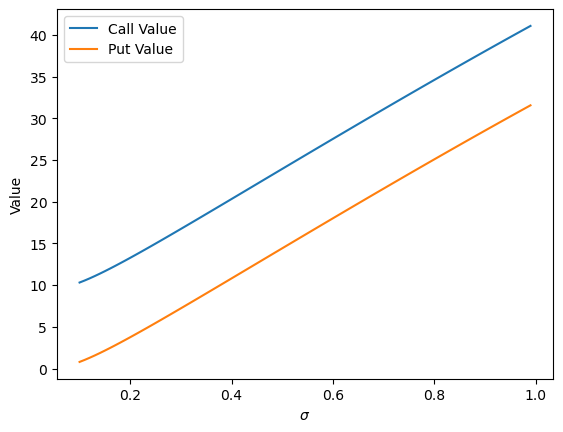

In [223]:
K = 100
r = 0.1
T = 1
S = 100

VOL = np.arange(0.1,1,0.01)

C = [call_BS(S,K,T,r,vol) for vol in VOL]
P = [put_BS(S,K,T,r,vol) for vol in VOL]
plt.plot(VOL,C,label='Call Value')
plt.plot(VOL,P,label='Put Value')
plt.xlabel('$\sigma$')
plt.ylabel('Value')
plt.legend()
plt.show()

We can see that the Value of the options determined by Black and Scholes seems to be like a linear function of the volaitlity $\sigma$. Explaining the necessity to know the correct implied volatility to compute the value of an option 

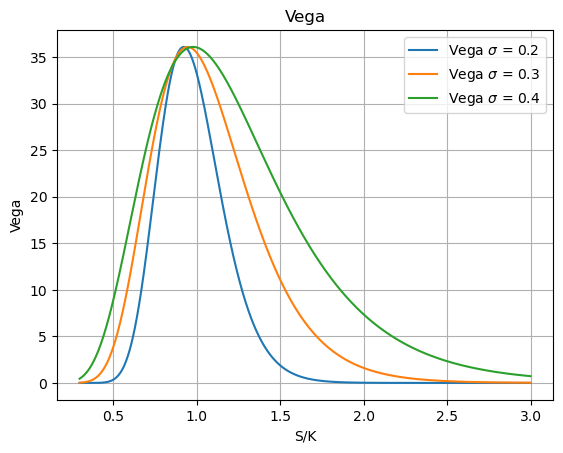

In [224]:
def vega_BS(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

def plot_vega(S, K, T, r,VOL):
    for vol in VOL :
        Vega = [vega_BS(s,K,T,r,vol) for s in S] 
        plt.plot(S/K, Vega, label=f'Vega $\\sigma$ = {round(vol, 2)}')
    plt.title(f'Vega')
    plt.xlabel(f'S/K')
    plt.ylabel(f'Vega')
    plt.legend()
    plt.grid()
    plt.show()

K = 100
r = 0.1
T = 1
VOL = np.arange(0.2,0.5,0.1)
S = np.arange(30,300,0.1)
plot_vega(S,K,T,r,VOL)


La courbe du vega est de plus en plus Sharp lorsque la volatilité diminue. On peut comprendre cela car plus la volatilité est faible plus elle n'aura de l'impact uniquement proche de ATM

In [225]:
def plot_vega(K, T, r,vol):
    Vega = [vega_BS(s,K,T,r,vol) for s in S] 
    plt.plot(S/K, Vega, label=f'Vega $\\sigma$ = {round(vol, 2)}')
    plt.title(f'Vega')
    plt.axvline(1, color='red', linestyle='--', label='ATM Option')
    plt.xlabel(f'S/K')
    plt.ylabel(f'Vega')
    plt.legend()
    plt.grid()
    plt.show()

S = np.arange(30,220,0.1)

interact(
    plot_vega,
    K=FloatSlider(value=100, min=30, max=170, step=1, description='Strike Price (K)'),
    T=FloatSlider(value=1, min=0.01, max=3, step=0.01, description='Time to Maturity (T)'),
    r=FloatSlider(value=0.1, min=0.01, max=0.2, step=0.01, description='Risk-free Rate (r)'),
    vol=FloatSlider(value=0.3, min=0.1, max=0.7, step=0.05, description=f'Volatility $\sigma$'),
)


<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/939479039.py:19: SyntaxWarning: invalid escape sequence '\s'
  vol=FloatSlider(value=0.3, min=0.1, max=0.7, step=0.05, description=f'Volatility $\sigma$'),


interactive(children=(FloatSlider(value=100.0, description='Strike Price (K)', max=170.0, min=30.0, step=1.0),…

<function __main__.plot_vega(K, T, r, vol)>

### Let's see the effect of Time on Black and Scholes

/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/2310501042.py:2: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/2310501042.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))


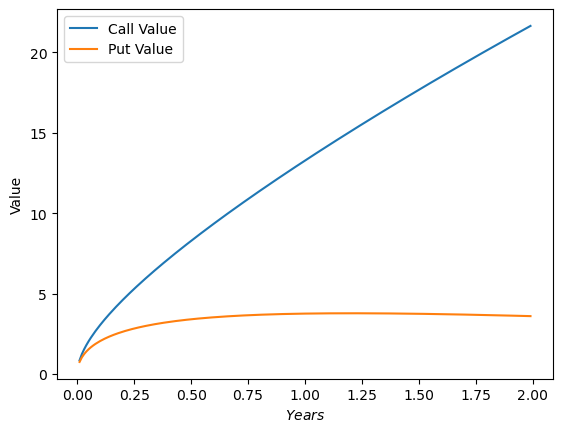

In [226]:
K = 100
r = 0.1
vol = 0.2
S = 100

T = np.arange(0,2,0.01)

C = [call_BS(S,K,t,r,vol) for t in T]
P = [put_BS(S,K,t,r,vol) for t in T]
plt.plot(T,C,label='Call Value')
plt.plot(T,P,label='Put Value')
plt.xlabel('$Years$')
plt.ylabel('Value')
plt.legend()
plt.show()

We can see that as far is the options maturity as expensive is the option.

In [227]:
def theta(s,K,T,r,vol,option_type):
    d1 = (np.log(s/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    if option_type == "Call":
        return -(s*vol*norm.pdf(d1))/(2*np.sqrt(T))-r*K*np.exp(-r*T)*norm.cdf(d2)
    elif option_type == "Put":
        return -(s*vol*norm.pdf(d1))/(2*np.sqrt(T))+r*K*np.exp(-r*T)*norm.cdf(-d2)


def plot_theta(K, T, r, vol, option_type):
    Theta = [theta(s,K,T,r,vol,option_type) for s in S]
    plt.figure(figsize=(10, 6))
    plt.plot(S/K, Theta, label=f'{option_type} Theta')
    plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
    plt.title(f'$\Theta$ {option_type} ')
    plt.xlabel('S/K')
    plt.ylabel(f'$\Theta$')
    plt.legend()
    plt.grid()
    plt.show()

S = np.arange(30,170,0.1)

interact(
    plot_theta,
    K=FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K)'),
    T=FloatSlider(value=1, min=0.01, max=3, step=0.01, description='Time to Maturity (T)'),
    r=FloatSlider(value=0.1, min=0.01, max=0.2, step=0.01, description='Risk-free Rate (r)'),
    vol=FloatSlider(value=0.3, min=0.01, max=1, step=0.01, description='Volatility (σ)'),
    option_type=["Call", "Put"],
)

<>:15: SyntaxWarning: invalid escape sequence '\T'
<>:17: SyntaxWarning: invalid escape sequence '\T'
<>:15: SyntaxWarning: invalid escape sequence '\T'
<>:17: SyntaxWarning: invalid escape sequence '\T'
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/4155454570.py:15: SyntaxWarning: invalid escape sequence '\T'
  plt.title(f'$\Theta$ {option_type} ')
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/4155454570.py:17: SyntaxWarning: invalid escape sequence '\T'
  plt.ylabel(f'$\Theta$')


interactive(children=(FloatSlider(value=100.0, description='Strike Price (K)', max=150.0, min=50.0, step=1.0),…

<function __main__.plot_theta(K, T, r, vol, option_type)>

### Let's see the effect of $r$ on Black and Scholes

In [228]:
def rho(s,K,T,r,vol,option_type):
    d1 = (np.log(s/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    if option_type == "Call":
          return K*T*np.exp(-r*T)*norm.cdf(d2)
    elif option_type == "Put":
          return -K*T*np.exp(-r*T)*norm.cdf(-d2)
    
    
def plot_rho(K,T,r,vol,option_type): 
    Rho = [rho(s,K,T,r,vol,option_type) for s in S]
    plt.figure(figsize=(10, 6))
    plt.plot(S/K, Rho, label=f'{option_type} Rho')
    plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
    plt.title(f'$Rho$ {option_type} ')
    plt.xlabel('S/K')
    plt.ylabel(f'$Rho$')
    plt.legend()
    plt.grid()
    plt.show()

S = np.arange(30,170,0.1)

interact(
    plot_rho,
    K=FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K)'),
    T=FloatSlider(value=0.5, min=0.1, max=1, step=0.01, description='Time to Maturity (T)'),
    r=FloatSlider(value=0.1, min=0.01, max=0.2, step=0.01, description='Risk-free Rate (r)'),
    vol=FloatSlider(value=0.3, min=0.01, max=1, step=0.01, description='Volatility (σ)'),
    option_type=["Call", "Put"],
)

interactive(children=(FloatSlider(value=100.0, description='Strike Price (K)', max=150.0, min=50.0, step=1.0),…

<function __main__.plot_rho(K, T, r, vol, option_type)>

## Black and Scholes PDE

In [229]:
def BS_pde(S,K,T,r,vol,option_type):
    return theta(S,K,T,r,vol,option_type) + r*S*delta(S,K,T,r,vol,option_type)+0.5*gamma(S,K,T,r,vol)*vol**2*S**2

def plot_BS_pde(K,T,r,vol,option_type): 
    PDE = [BS_pde(s,K,T,r,vol,option_type) for s in S]
    plt.figure(figsize=(10, 6))
    plt.plot(S/K, PDE, label=f'{option_type} Rho')
    plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
    plt.title(f'$Rho$ {option_type} ')
    plt.xlabel('S/K')
    plt.ylabel(f'$Rho$')
    plt.legend()
    plt.grid()
    plt.show()

S = np.arange(30,170,0.1)

interact(
    plot_BS_pde,
    K=FloatSlider(value=100, min=50, max=150, step=1, description='Strike Price (K)'),
    T=FloatSlider(value=0.5, min=0.1, max=1, step=0.01, description='Time to Maturity (T)'),
    r=FloatSlider(value=0.1, min=0.01, max=0.2, step=0.01, description='Risk-free Rate (r)'),
    vol=FloatSlider(value=0.3, min=0.01, max=1, step=0.01, description='Volatility (σ)'),
    option_type=["Call", "Put"],
)


interactive(children=(FloatSlider(value=100.0, description='Strike Price (K)', max=150.0, min=50.0, step=1.0),…

<function __main__.plot_BS_pde(K, T, r, vol, option_type)>

## Approximation of the Greeks

### 1) Approximation of Vega

<>:15: SyntaxWarning: invalid escape sequence '\D'
<>:15: SyntaxWarning: invalid escape sequence '\D'
/var/folders/q6/w6mg99v94cd8ptz_m5r4q2g40000gn/T/ipykernel_2655/805191840.py:15: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel(f'$\Delta$')


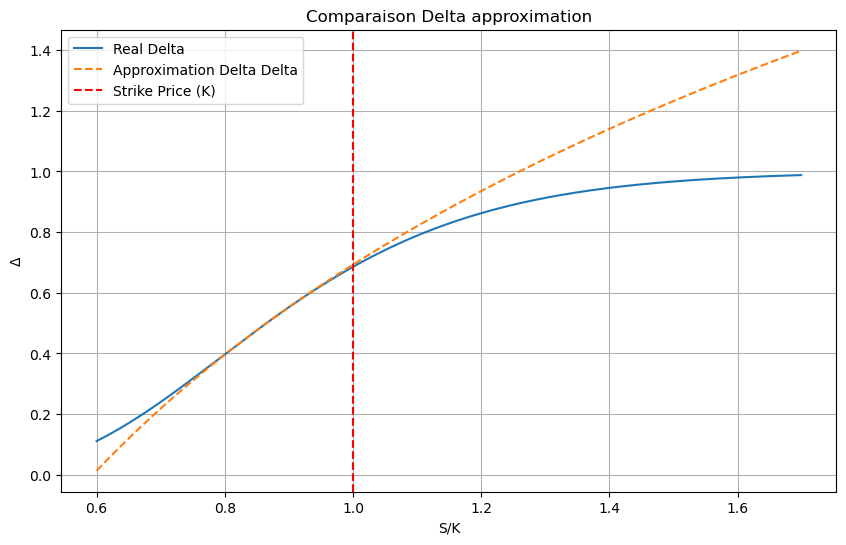

In [235]:
def approx_delta_call(S,K,T,r,vol):
    d1 = (np.log(S/K)+(r + vol**2/2)*T) / (vol*np.sqrt(T))
    return 1/2+1/np.sqrt(2*np.pi)*d1

S = np.arange(60,170,0.1)
Delta = [delta(s,100,1,0.1,0.3,"Call") for s in S]
Approx_Delta = [approx_delta_call(s,100,1,0.1,0.3) for s in S]

plt.figure(figsize=(10, 6))
plt.plot(S/K, Delta, label='Real Delta')
plt.plot(S/K, Approx_Delta, linestyle='--',label=f'Approximation Delta Delta')
plt.axvline(1, color='red', linestyle='--', label='Strike Price (K)')
plt.title('Comparaison Delta approximation')
plt.xlabel('S/K')
plt.ylabel(f'$\Delta$')
plt.legend()
plt.grid()
plt.show()


As much as we go far from the money, the approximation becomes less and less accurate. This is because the DL has been done next to 0.